In [ ]:
import math
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

In [ ]:
class Function():
  def __init__(self, name = None, value = [], interval = []):
    self.name = name
    self.val = value
    self.t = interval
  def remove_first(self):
    self.t.pop(0)
    return self.val.pop(0)
  def isEmpty(self):
    return not self.val

In [ ]:
class Stack():
  def __init__(self):
    self.stack = []
  def push(self, value):
    self.stack.append(value)
  def pop(self):
    return self.stack.pop()
  def index(self, i):
    return self.stack[len(self.stack) - 1 - i]

In [ ]:
def convolution(f1, f2):

  x, h = (deepcopy(f2), deepcopy(f1)) if len(f1.t) > len(f2.t) else (deepcopy(f1), deepcopy(f2))

  h.t = [-t for t in h.t]
  delta = x.t[0] - h.t[0]
  h.t = [t + delta for t in h.t]

  y = Function('y', [], [])
  length = len(x.t) + len(h.t) - 1

  overlap = Stack()
  overlap.push(h.remove_first())
  for i in range(0, length):
    sigma = 0
    y.t.append(i + delta)
    overlap_section = min([len(overlap.stack), len(x.val)])
    for j in range(0, overlap_section):
      sigma = sigma + overlap.index(j) * x.val[j]
    y.val.append(sigma)
    
    if not h.isEmpty():
      overlap.push(h.remove_first())
    else:
      x.remove_first()

  return y

In [ ]:
def plot(func):

  name, val, t = func.name, func.val, func.t

  plt.scatter(t, val, label = '{0}(t)'.format(name))

  plt.title(name + '(t)')

  plt.xlabel('t axis')
  plt.ylabel(name + ' axis')

  plt.grid(alpha= .4, linestyle = '--')

  plt.legend()

In [ ]:
def step(t):
  return [1 for x in t]

In [ ]:
def ramp(t):
  return [x for x in t]

In [ ]:
def interval(t1, t2):
  return [t for t in range(t1, t2)]

---

# Célula de criação das funções x(t) e h(t) abaixo


Para definir o intervalo de tempo da função:
```
t = interval(a, b)
```
Para alterar o valor em cada instante t:

```
val = [f(x) for x in t] 
```
Funções pré-prontas:

1.   ```step(t)```
2.   ```ramp(t)```

Exponencial (exemplo exp(x)):


```
[math.exp(x) for x in t] 
```

Passe ```t``` e ```val``` como parâmetros do objeto ```Function```, que recebe nome, valor e intervalo de tempo.

Use ```plot(f)``` para mostrar a função graficamente.

```convolution(x, h)``` recebe 2 objetos do tipo ```Function``` e retorna uma ```Function```.

---

Abaixo jaz um exemplo de como gerar x(t) = u(t) para t entre 0 e 10 e h(t) = 0.5^t para t entre 0 e 10:

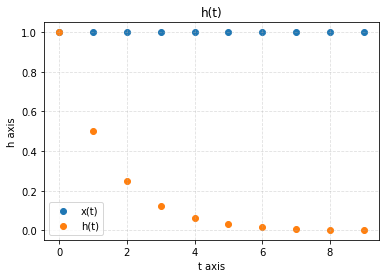

In [ ]:
# Criar função x(t)
t = interval(0, 10)                        # Determinar intervalo de tempo
val = step(t)                              # Valor para cada t.
x = Function('x', val, t)
plot(x)

# Criar função h(t)
t = interval(0, 10)
val = [0.5 ** x for x in t]        
h = Function('h', val, t)
plot(h)

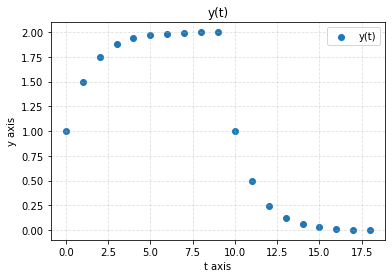

In [ ]:
y = convolution(x, h)
plot(y)